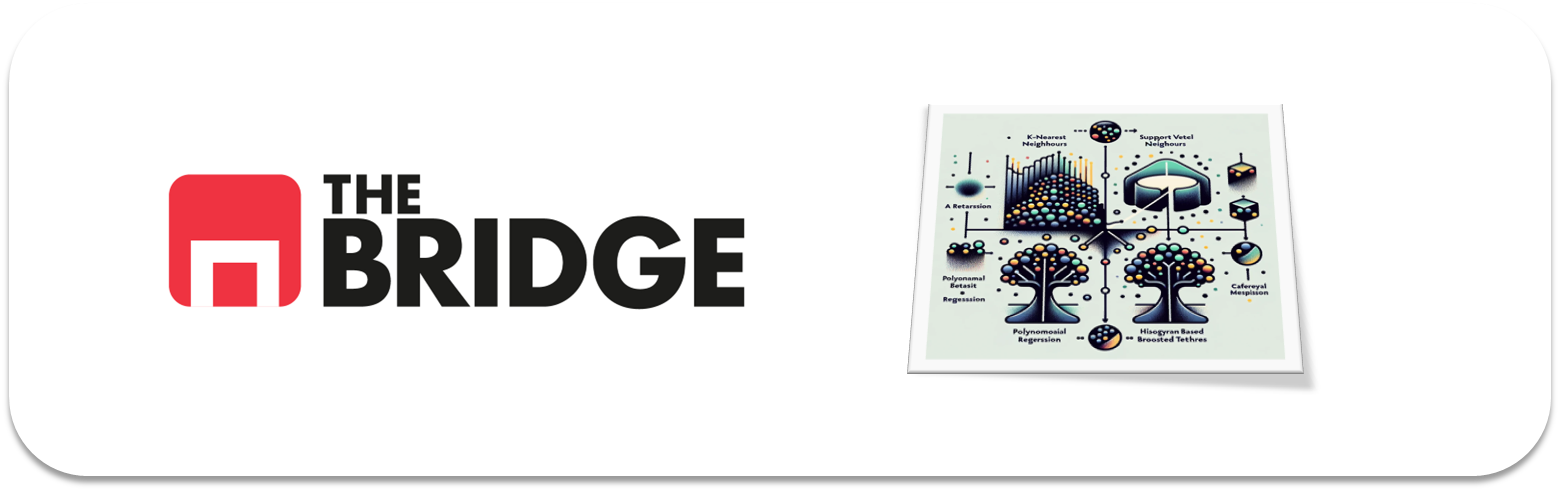

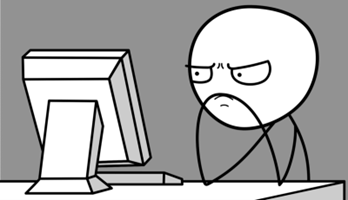

Para hacer un **repaso a los problemas de clasificacion con ML**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### INTRODUCCIóN: PROCESO DE ML

En los siguientes ejercicios vamos a seguir (de nuevo) los pasos básicos en la creación de un modelo de ML para resolver un problema de predicción a partir de un dataset que incluye el target, es decir, un aprendizaje supervisado.

En concreto, vamos a trabajar sobre un problema de clasificación a través de los siguientes pasos:

1. Entendimiento del problema (selección de la métrica más adecuada)  
2. Obtención de datos y primer contacto  
3. Train y Test  
4. MiniEDA: Análisis del target, análisis bivariante, entendimiento de las features, selección de las mismas (si es necesario)  
5. Preparación del dataset de Train: Conversión de categóricas, tratamiento de numéricas  
6. Selección e instanciación de modelos. Baseline.
7. Comparación de modelos (lo haremos por comparación con validación, puedes hacerlo por comparación de modelos de hiperparámetros optimizados, si así lo prefieres)  
8. Selección de modelo: Optimización de hiperparámetros (ten en cuenta la nota de 7)  
9. Equilibrado del train set  
10. Evaluación contra test.  
11. Análisis de errores, posibles acciones futuras.  
12. EXTRA: Persistencia del modelo en disco.  

### El problema

La unidad oncológica del hospital de Madison, Wisconsin, está trabajando en un tratamiento muy prometedor sobre el cáncer de mama. Desgraciadamente es un tratamiento con efectos secundarios y todavía excesivamente caro, pero cuya efectividad es extraordinaria si se aplica en las primeras etpas o incluso antes de haberlo desarrollado. 

En este sentido, la univeridad quiere disponer de un modelo que le permita detectar potenciales pacientes pero con un alto nivel de acierto en detectar quien puede tener cáncer para no aplicar el tratamiento a personas que no fueran a desarrollarlo y por tanto no sólo perder dinero, sino también, y más importante causar problemas a esas personas. 

Nos piden trabajar sobre datos que ya tienen, y que pueden obtener facilmente de cualquier futuro aspirante a las pruebas y ensayos con el tratamiento, de pacientes que desarrollaron y no el cáncer. Sobre ese dataset quieren que les proporcionemos el mejor modelo de predicción de quién desarrollará o no el cáncer y que cumpla con las expectativas del párrafo anterior.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from catboost import CatBoostClassifier

### Ejercicio 1: Entendiendo el problema de "Negocio"

En función de la descripción del problema de "negocio" y sin mirar todavía los datos, ¿qué tipo de problema de clasificación vamos a resolver? ¿Qué métricas creess más conveniente para medir el rendimiento del modelo a construir y, por tanto, para comparar posibles modelos entre sí?

Este es un problema de clasificación binaria. El objetivo es predecir si un paciente desarrollará cáncer de mama o no.

Métricas sugeridas:

Precision: Minimizar falsos positivos para no aplicar un tratamiento innecesario.

Recall: Maximizar verdaderos positivos para asegurar que se detecten todos los casos reales de cáncer.

F1-Score: Un equilibrio entre precision y recall.


Conclusión: Dependiendo de la prioridad del hospital (minimizar falsos positivos o falsos negativos), la métrica clave sería precision o recall, pero podríamos considerar F1-Score como métrica combinada.

### Ejercicio 2: Obtención y primer "vistazo"

Carga el dataset, muestra sus primeras filas, su descripción general y determina el tipo de variables que vamos a manejar. Escoge el target y crea una variable `target` y asignalé el nombre de la columna correspondiente.

In [6]:
data = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_12/Unidad_02/Ejercicios_Workout/data/wisconsin_cancer.csv", delimiter="|")

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    fl

In [7]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600


In [8]:
data.dtypes

diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
radius_se                 float64
texture_se                float64
perimeter_se              float64
area_se                   float64
smoothness_se             float64
compactness_se            float64
concavity_se              float64
concave points_se         float64
symmetry_se               float64
fractal_dimension_se      float64
radius_worst              float64
texture_worst             float64
perimeter_worst           float64
area_worst                float64
smoothness_worst          float64
dtype: object

NOTA: Para más información sobre el dataset el hospital nos redirige a esta [página web](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download)

### Ejercicio 3: Split

Haz el split en train y test.

In [11]:
data = data.rename(columns={"diagnosis": "target"})

# Separar las features y el target
X = data.drop(columns=["target"])
y = data["target"]

# Dividir los datos en train (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verificar las dimensiones de los conjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((398, 25), (171, 25), (398,), (171,))

### Ejercicio 4: MiniEDA (I)

Analiza la distribución frecuencial de target brevemente.

In [12]:
# Analizar la distribución del target
target_distribution = y_train.value_counts(normalize=True) * 100

# Mostrar la distribución frecuencial del target
target_distribution

target
B    62.81407
M    37.18593
Name: proportion, dtype: float64

B (Benigno): 62.81%
M (Maligno): 37.18%

### Ejercicio 5: MiniEDA (II)

Analiza bivariantemente las variables contra el target, de forma que veamos las distintas distribuciones para cada clase (puedes emplear la libería gráfica que crees conveniente)

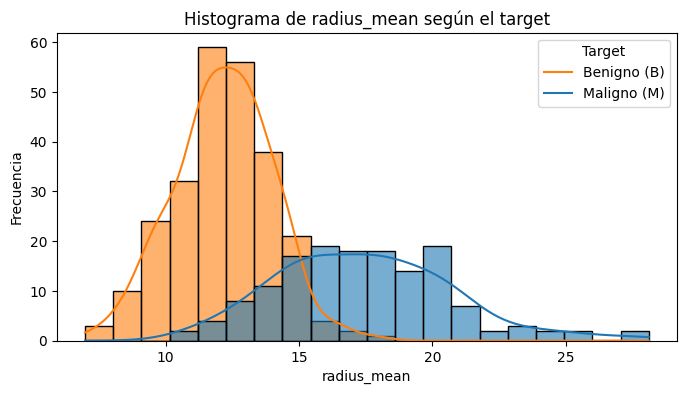

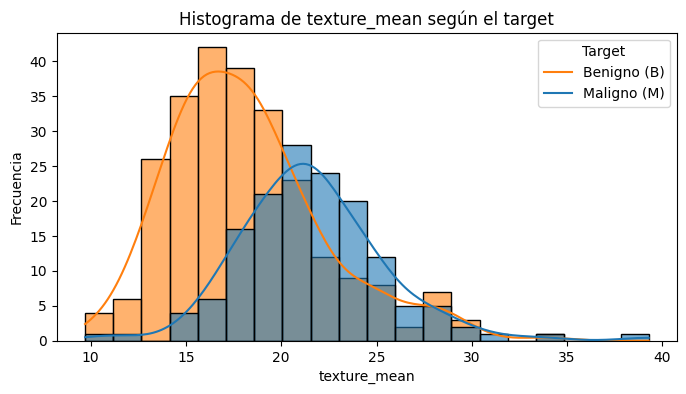

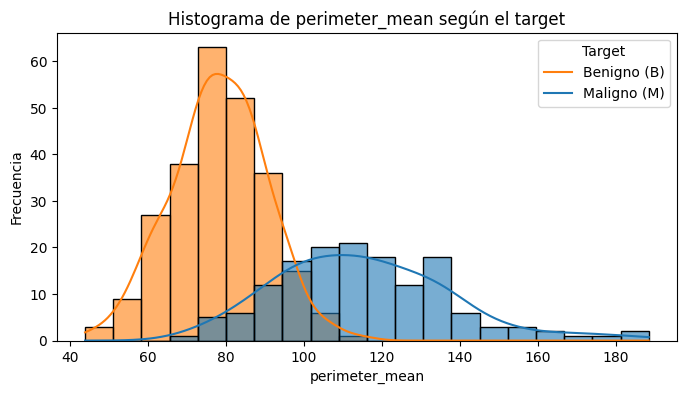

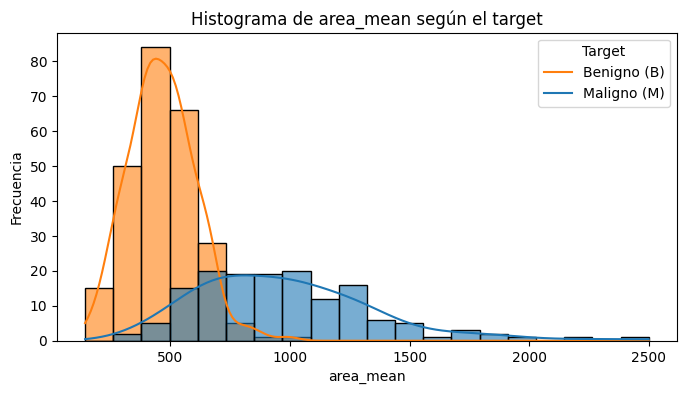

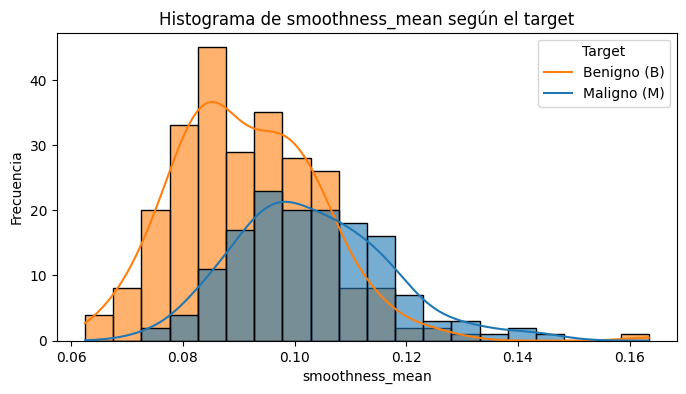

In [14]:
train_data = X_train.copy()
train_data['target'] = y_train

# Seleccionar algunas variables para el análisis bivariante
variables_seleccionadas = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']


# Crear histogramas superpuestos para las variables seleccionadas
for variable in variables_seleccionadas:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=train_data, x=variable, hue="target", kde=True, bins=20, alpha=0.6)
    plt.title(f"Histograma de {variable} según el target")
    plt.xlabel(variable)
    plt.ylabel("Frecuencia")
    plt.legend(title="Target", labels=["Benigno (B)", "Maligno (M)"])
    plt.show()

En resumen, radius_mean, perimeter_mean y area_mean parecen ser las variables más informativas para diferenciar entre los tumores benignos y malignos.

### Ejercicio 6: MiniEDA (III)

Crea una variable de tipo lista a la que asignes los valores de las columnas que creas conveniente emplear como features en función de lo visto en el miniEDA. Haz una lista de modelos/algoritmos que vas a emplear para hacer el modelo (solo los nombres). En función de la lista anterior, ¿tienes que tratar las variables, por qué?

In [15]:
# Seleccionar las variables más relevantes basadas en el análisis
features_seleccionadas = ['radius_mean', 'perimeter_mean', 'area_mean']

# Crear una lista de modelos a probar
modelos_a_probar = [
    "Logistic Regression",
    "Random Forest",
    "Support Vector Machine (SVM)",
    "Gradient Boosting (CatBoost)",
    "K-Nearest Neighbors (KNN)"
]

# Explicación del tratamiento de las variables:
# - No es necesario transformar las variables seleccionadas a formato numérico porque ya son numéricas.
# - Sin embargo, algunas técnicas como SVM y KNN requerirán escalado para que las diferencias de rango entre las variables no sesguen el resultado.

features_seleccionadas, modelos_a_probar

(['radius_mean', 'perimeter_mean', 'area_mean'],
 ['Logistic Regression',
  'Random Forest',
  'Support Vector Machine (SVM)',
  'Gradient Boosting (CatBoost)',
  'K-Nearest Neighbors (KNN)'])

### Ejercicio 7: Tratamiento de features

Trata las features de manera que puedan ser empleadas por los modelos que escogite en el ejercicio anterior. Recuerda que este es un paso necesario porque los modelos no entienden de primeras de "letras" (salvo alguno que no es que entienda sino que hace sus transformaciones por dentro) y porque en determinados algoritmos es necesario que los rangos de las features estén escalados para que el algoritmo no se decante (érroneamente) por alguna feature sólo porque sus valores son mayores en rango que el de otras. NOTA: Recuerda que lo que le hagas al train, se lo tienes que hacer al test

In [17]:
# Escalar las variables seleccionadas en el conjunto de entrenamiento y prueba
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[features_seleccionadas])
X_test_scaled = scaler.transform(X_test[features_seleccionadas])

# Convertir los resultados escalados nuevamente a DataFrames para mantener las etiquetas de las columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features_seleccionadas, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features_seleccionadas, index=X_test.index)

# Verificar las primeras filas del conjunto escalado
X_train_scaled.head()


,radius_mean,perimeter_mean,area_mean
78,1.705820,2.121295,1.669337
330,0.536388,0.569095,0.390316
378,-0.131456,-0.148848,-0.211543
213,0.928077,0.925405,0.828546
89,0.144699,0.158315,-0.009697


### Ejercicio 8: Creación de los dataset de train y test

Crea las parejas X,y de train y test.

In [18]:
# Crear las parejas X, y para train y test con las variables escaladas
X_train_final = X_train_scaled
X_test_final = X_test_scaled
y_train_final = y_train.reset_index(drop=True)
y_test_final = y_test.reset_index(drop=True)

# Verificar las dimensiones de los conjuntos finales
X_train_final.shape, X_test_final.shape, y_train_final.shape, y_test_final.shape

((398, 3), (171, 3), (398,), (171,))

### Ejercicio 9: Instanciación de modelos

Importa e instancia los modelos que hayas escogido en el ejercicio 6. En general, no hace falta que asignes ahora ningún hiperparámetro salvo en los basados en árboles en los que debes escoger un max_depth para evitar el sobreajuste inicial. Si quieres emplear la regresión logística es posible que tengas que utilizar un valor de max_iter para que el algoritmo converja.

In [20]:
# Instanciar los modelos
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(max_depth=5, random_state=42)
svm = SVC(probability=True, random_state=42)
knn = KNeighborsClassifier()
catboost = CatBoostClassifier(verbose=0, random_state=42)

# Lista de modelos instanciados
modelos_instanciados = {
    "Logistic Regression": logistic_regression,
    "Random Forest": random_forest,
    "Support Vector Machine (SVM)": svm,
    "K-Nearest Neighbors (KNN)": knn,
    "Gradient Boosting (CatBoost)": catboost
}

# Mostrar los modelos instanciados
modelos_instanciados


{'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
 'Random Forest': RandomForestClassifier(max_depth=5, random_state=42),
 'Support Vector Machine (SVM)': SVC(probability=True, random_state=42),
 'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
 'Gradient Boosting (CatBoost)': <catboost.core.CatBoostClassifier at 0x1611e0e50>}

### Ejercicio 10: Comparativa de modelos

Haz la comparativa de modelos empleando cross_val_score (es decir la validación cruzada). Utiliza k = 5, y un scoring acorde a la métrica escogida en el ejercicio 1. Si no tienes clara la métrica entonces emplea el recall_medio y usa scoring = "balanced acuracy". Escoge el modelo ganador.

In [23]:
# Instanciar los modelos
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(max_depth=5, random_state=42)
svm = SVC(probability=True, random_state=42)
knn = KNeighborsClassifier()

# Lista de modelos instanciados
modelos_instanciados = {
    "Logistic Regression": logistic_regression,
    "Random Forest": random_forest,
    "Support Vector Machine (SVM)": svm,
    "K-Nearest Neighbors (KNN)": knn
}

# Evaluar cada modelo usando validación cruzada (k=5) con scoring basado en balanced_accuracy
scoring_metric = "balanced_accuracy"
resultados_cross_val = {}

for nombre, modelo in modelos_instanciados.items():
    try:
        scores = cross_val_score(modelo, X_train_final, y_train_final, cv=5, scoring=scoring_metric)
        resultados_cross_val[nombre] = scores.mean()
    except Exception as e:
        resultados_cross_val[nombre] = f"Error: {e}"

# Mostrar los resultados de la validación cruzada
resultados_cross_val


{'Logistic Regression': 0.8722758620689655,
 'Random Forest': 0.86416091954023,
 'Support Vector Machine (SVM)': 0.8654942528735632,
 'K-Nearest Neighbors (KNN)': 0.8661609195402299}

### Ejercicio 11: Ajuste de hiperparámetros

Escoge un grid para ajustar los hiperparámetros de tu modelo. Crea un objeto GridSearch y "ajustalo" (emplea su método fit) para encontrar la mejor combinaciónde hiperparámetros empleando la métrica que decidimos en el ejercio 1. Si no lo tienes claro emplea "balance accuracy". Por otro lado, incluye en el grid, el hiperparámetro que permita que el modelo "compense" el desbalanceo del dataset de entrada, aunque este no lo tenga.

In [25]:
# Definir un grid de hiperparámetros para Logistic Regression
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  # Regularización
    "solver": ["liblinear", "lbfgs"]  # Métodos de optimización
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=logistic_regression,
    param_grid=param_grid,
    cv=5,
    scoring="balanced_accuracy",
    n_jobs=-1
)

# Ajustar el grid a los datos de entrenamiento
grid_search.fit(X_train_final, y_train_final)

# Obtener los mejores hiperparámetros y el score
mejores_hiperparametros = grid_search.best_params_
mejor_score = grid_search.best_score_

mejores_hiperparametros, mejor_score

({'C': 100, 'solver': 'liblinear'}, 0.8792873563218391)

### Ejercicio 12: Evaluación del modelo

Evalúa el modelo contra el dataset de test. Muestra el informe de clasificación y haz una valoración de si el hospital aceptaría el modelo o no.

In [27]:
# Reinstanciar el modelo con los mejores hiperparámetros
mejor_modelo = LogisticRegression(C=100, solver="liblinear", max_iter=1000, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento completo
mejor_modelo.fit(X_train_scaled, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = mejor_modelo.predict(X_test_scaled)

# Generar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred, target_names=["Benigno (B)", "Maligno (M)"])

print("Informe de Clasificación:\n")
print(informe_clasificacion)

Informe de Clasificación:

              precision    recall  f1-score   support

 Benigno (B)       0.89      0.96      0.92       107
 Maligno (M)       0.93      0.80      0.86        64

    accuracy                           0.90       171
   macro avg       0.91      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171



El modelo muestra un buen equilibrio general entre las métricas, 
pero hay margen de mejora en el recall para la clase Maligno (M), 
ya que se pierden algunos casos malignos (falsos negativos).

Dado que el hospital tiene como prioridad identificar correctamente a
los pacientes con cáncer (minimizar falsos negativos), es posible que se necesiten ajustes adicionales, 
como equilibrar el conjunto de entrenamiento o probar modelos más avanzados.

### Ejercicio 13: Análisis de errores

Muestra la matriz de confusión con los porcentajes de precisión (emplea ConfusionMatrixDisplay.from_predictions con el argumento normalize con el valor adecuado). Haz un pequeño análisis.

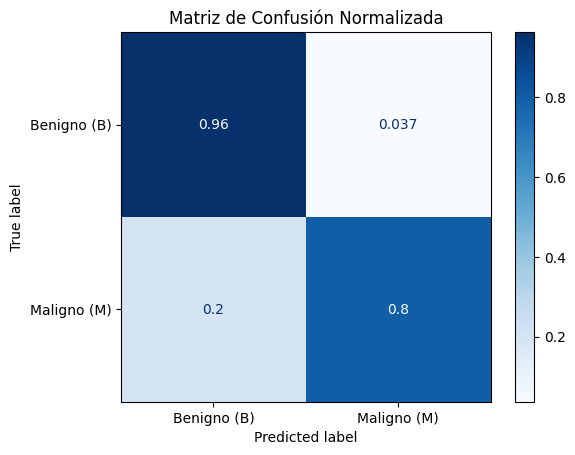

In [29]:
# Mostrar la matriz de confusión con normalización por filas (para visualizar porcentajes)
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=["Benigno (B)", "Maligno (M)"],
    normalize="true",
    cmap="Blues"
)
plt.title("Matriz de Confusión Normalizada")
plt.show()

La matriz de confusión normalizada muestra lo siguiente:

Clase Benigno (B):

El 96% de los casos benignos reales se predijeron correctamente.

El 4% fueron falsamente clasificados como malignos.


Clase Maligno (M):

El 80% de los casos malignos reales se predijeron correctamente.

El 20% fueron falsamente clasificados como benignos (falsos negativos).


Análisis:

El modelo tiene un excelente desempeño en identificar casos benignos, pero aún pierde un 20% de los casos malignos, 

lo cual podría ser preocupante en un contexto médico.


Acciones futuras para mejorar:

Reequilibrar el dataset (por ejemplo, mediante sobremuestreo o submuestreo).

Probar otros algoritmos que manejen desbalance de clases, como CatBoost o XGBoost.

Ajustar los umbrales de decisión del modelo para priorizar la detección de casos malignos (mejorar el recall de la clase Maligno).


### EXTRA: 

Busca en Internet o pregúntale a tu AI preferida, cómo se graba un modelo en disco y gúardalo en "./models/cancer_pred" con la extesión apropiada.

In [30]:
import joblib

# Crear un directorio para guardar el modelo si no existe
import os
os.makedirs("./models", exist_ok=True)

# Guardar el modelo en disco
model_path = "./models/cancer_pred_model.pkl"
joblib.dump(mejor_modelo, model_path)

# Confirmar la ruta del modelo guardado
model_path

'./models/cancer_pred_model.pkl'